In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
!pip install bioinfokit

In [3]:
df=pd.read_csv("mcdonalds.csv")

In [4]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [7]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

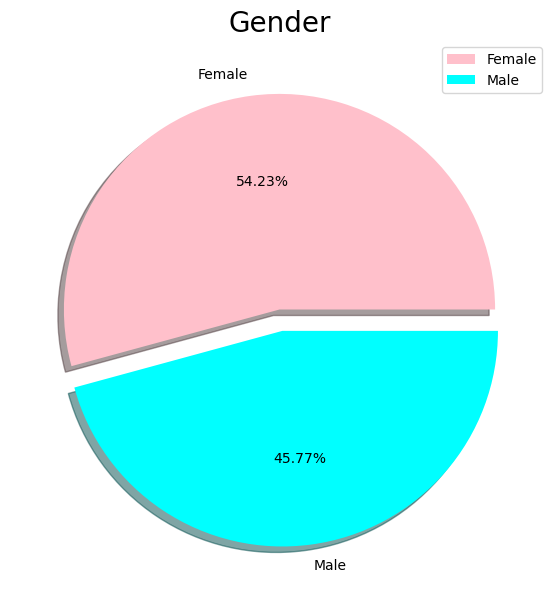

In [8]:
#EXPLORING DATA

#Customer segmentation - based on socio-demographs (Age & Gender)

#Gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
#we infer that there are more female customers than male.

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


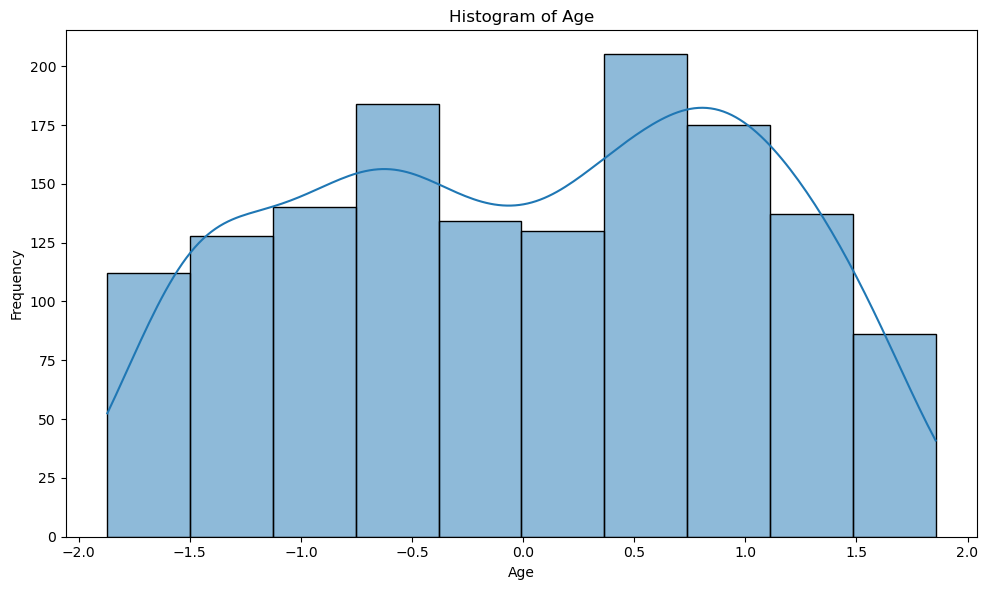

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the histogram
sns.histplot(df['Age'], bins=10, kde=True)  # Change 'Age' if your column name is different
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20584\904487904.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Like", y="Age",data=df,
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

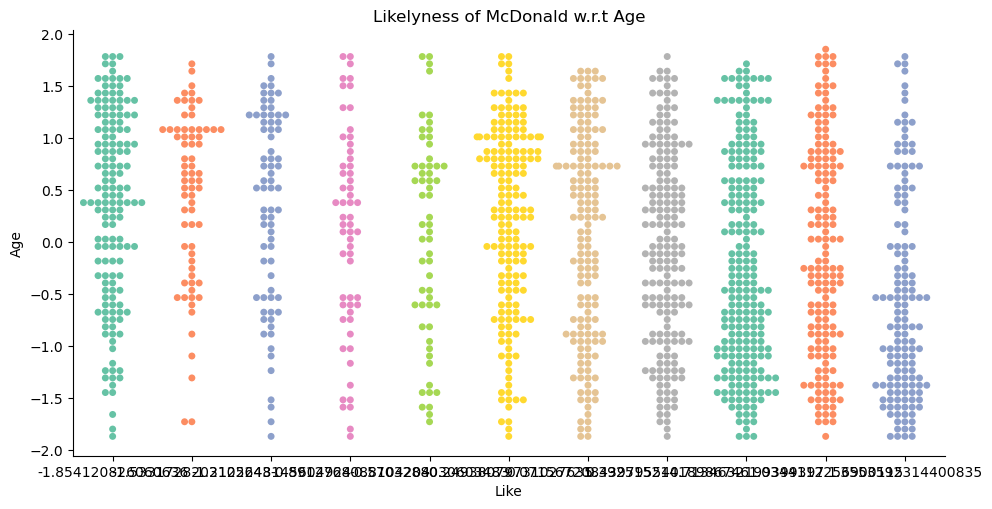

In [34]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like
sns.catplot(x="Like", y="Age",data=df,
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()
     

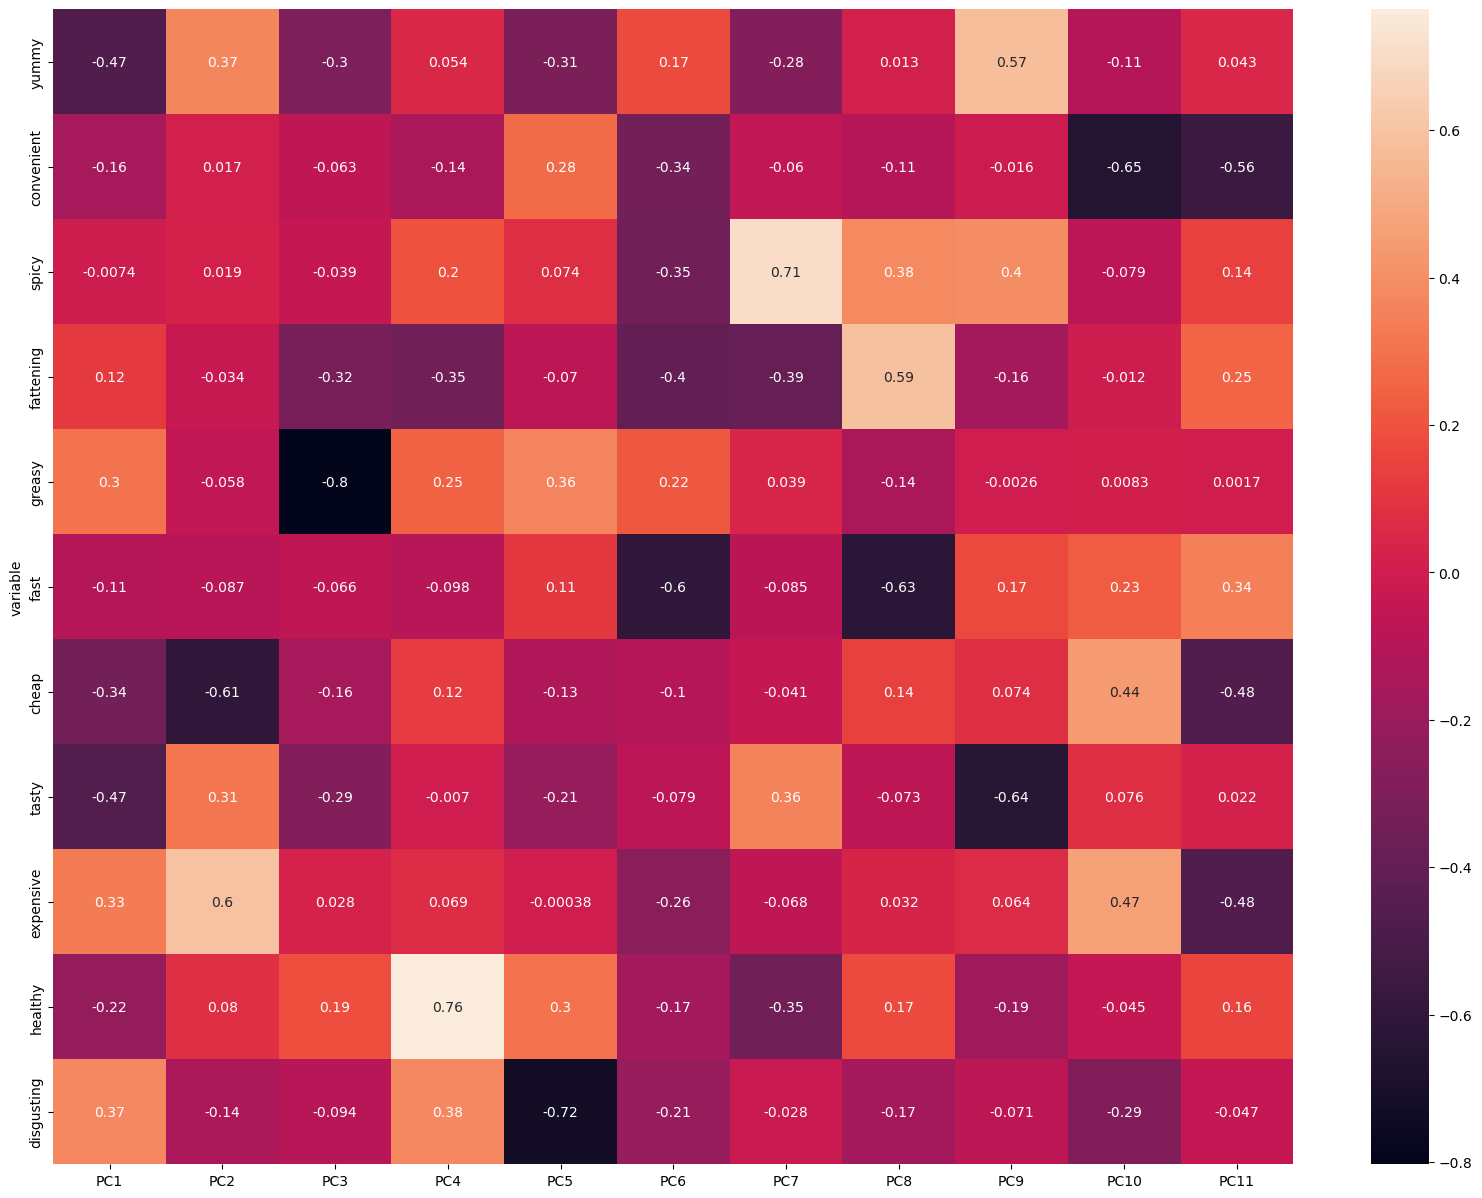

In [35]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True)
plt.show()

->'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting': These seem to be categorical (Yes/No) responses.

->'Like': It has numerical values such as -3, +2, etc., which likely represent a rating or preference score.

->'Age': This is a numerical column.

->'VisitFrequency': This contains frequency descriptions (e.g., "Every three months", "Once a week").

->'Gender': Contains categorical data (e.g., "Male", "Female").

In [9]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [10]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)


In [11]:
visit_mapping = {
    'Once a week': 4,
    'Once a month': 3,
    'Every three months': 2,
    'Once a year': 1,
    'Never': 0
}
df['VisitFrequency'] = df['VisitFrequency'].map(visit_mapping)


In [12]:
import pandas as pd

print(df['Like'].unique())

# Clean the 'Like' column to extract numeric values
df['Like'] = df['Like'].astype(str).str.extract('([-+]?\d*\.?\d+)')[0]  # Extract numeric part
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')  # Convert to float, coercing errors to NaN

# Check the modified DataFrame
print(df['Like'].head())


['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
0   -3
1    2
2    1
3    4
4    2
Name: Like, dtype: int64


In [13]:
df['Like'] = df['Like'].astype(str).str.replace('[^-\d]', '').astype(float)


In [14]:
df['PositiveSentiment'] = df[['yummy', 'tasty', 'healthy']].sum(axis=1)
df['NegativeSentiment'] = df[['disgusting', 'fattening', 'greasy']].sum(axis=1)


In [15]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['Like', 'Age']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [18]:
df = pd.get_dummies(df, columns=['VisitFrequency', 'AgeGroup'], drop_first=True)


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[numerical_cols])


In [20]:
df = df.drop_duplicates()

In [22]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,VisitFrequency_1.0,VisitFrequency_2.0,VisitFrequency_3.0,VisitFrequency_4.0,AgeGroup_18-25,AgeGroup_25-35,AgeGroup_35-45,AgeGroup_45-55,AgeGroup_55-65,AgeGroup_65+
0,0,1,0,1,0,1,1,0,1,0,...,False,True,False,False,False,False,False,False,True,False
1,1,1,0,1,1,1,1,1,1,0,...,False,True,False,False,False,False,False,True,False,False
2,0,1,1,1,1,1,0,1,1,1,...,False,True,False,False,False,False,False,False,True,False
3,1,1,0,1,1,1,1,1,0,0,...,False,False,False,True,False,False,False,False,False,True
4,0,1,0,1,1,1,1,0,0,1,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,...,True,False,False,False,False,False,False,True,False,False
1449,1,1,0,1,0,0,1,1,0,1,...,False,False,False,True,False,False,True,False,False,False
1450,1,1,0,1,0,1,0,1,1,0,...,False,False,True,False,False,False,False,True,False,False
1451,1,1,0,0,0,1,1,1,0,1,...,False,True,False,False,False,False,True,False,False,False


In [23]:
#Considering only the 11 cols and converting it into array
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [25]:
#Considering only first 11 attributes
df_eleven = df.loc[:,cat]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [26]:
#Principal component analysis

from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.419114,-0.231691,0.660553,-0.394399,0.200925,-0.391549,-0.213729,0.167607,0.179510,0.531101,-0.554209
1,-0.220189,0.393341,-0.729516,-0.102505,0.043964,-0.085099,-0.095786,-0.034779,0.110699,0.507822,-0.487602
2,0.371455,0.728362,-0.124168,0.683734,0.849209,-0.677356,0.581753,0.364017,-0.327911,0.050151,0.243132
3,-0.179665,-0.345683,-0.851313,0.204693,-0.680349,-0.036688,-0.056524,-0.232855,-0.024518,-0.247991,-0.056664
4,0.173971,-0.808123,0.016911,0.545781,0.860236,-0.083213,-0.456052,0.164836,-0.073457,0.027998,0.081264
...,...,...,...,...,...,...,...,...,...,...,...
1426,1.547013,0.263928,-0.014192,0.201105,-0.146572,0.309209,-0.076867,0.344021,-0.136215,-0.419146,-0.464879
1427,-0.963333,0.018977,0.298754,0.445180,-0.134964,0.391248,-0.330860,0.870713,-0.305065,-0.240094,-0.197849
1428,-0.182781,1.057798,0.229392,-0.470739,-0.191532,-0.199227,-0.093868,-0.033670,0.039346,0.057964,-0.012160
1429,-1.188787,-0.033521,0.555086,0.696727,0.047700,0.195972,-0.024075,-0.345070,0.023337,-0.000024,-0.107268


In [27]:
#Proportion of Variance (from PC1 to PC11)
pca.explained_variance_ratio_
     

array([0.29899056, 0.19156392, 0.13267983, 0.08290307, 0.05969759,
       0.05069322, 0.04429957, 0.03985029, 0.03715547, 0.03260161,
       0.02956487])

In [28]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29899056, 0.49055448, 0.62323431, 0.70613738, 0.76583497,
       0.81652819, 0.86082776, 0.90067805, 0.93783352, 0.97043513,
       1.        ])

In [29]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.473652,0.370610,-0.301355,0.053818,-0.307839,0.170267,-0.278457,0.012604,0.574230,-0.107604,0.042649
convenient,-0.155302,0.016830,-0.062892,-0.144547,0.276766,-0.343663,-0.060092,-0.108304,-0.015511,-0.652477,-0.561015
spicy,-0.007448,0.019080,-0.039472,0.199271,0.073973,-0.353279,0.707035,0.381458,0.395773,-0.079203,0.140418
fattening,0.116058,-0.034366,-0.322261,-0.349149,-0.069891,-0.403426,-0.392024,0.590763,-0.160342,-0.011932,0.251830
greasy,0.303698,-0.057601,-0.802992,0.245048,0.362733,0.215346,0.038995,-0.141622,-0.002631,0.008337,0.001655
fast,-0.109396,-0.086865,-0.065928,-0.097602,0.112772,-0.598702,-0.085239,-0.625020,0.168059,0.228139,0.342411
cheap,-0.341107,-0.606855,-0.155916,0.123186,-0.127236,-0.101218,-0.040913,0.140513,0.073985,0.441522,-0.477097
tasty,-0.469349,0.312024,-0.285723,-0.006973,-0.211855,-0.079163,0.357405,-0.073368,-0.640410,0.075988,0.022303
expensive,0.333174,0.598525,0.028200,0.068841,-0.000381,-0.262920,-0.067548,0.031604,0.064168,0.466890,-0.477950


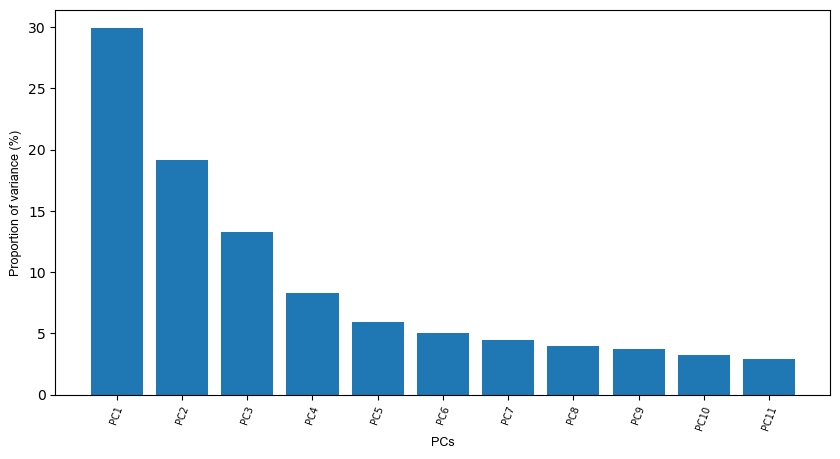

In [31]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

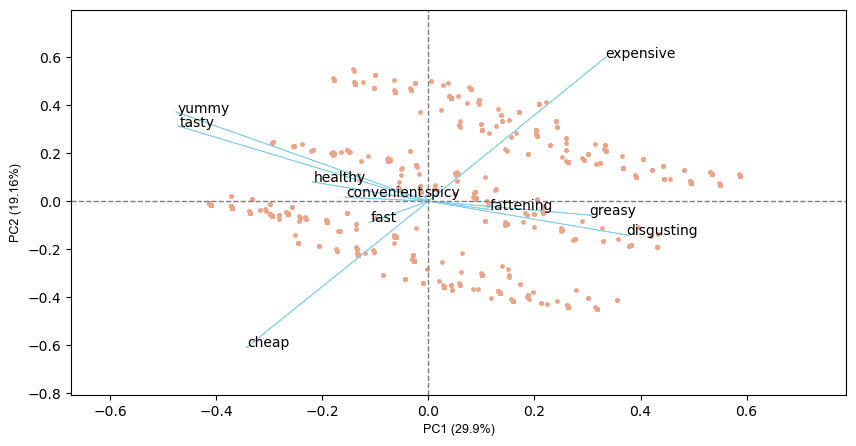

In [32]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))